In this issue of Beacondigest, we focus on looking at the validator performance of 1000 randomly chosen validaotrs belonging to 3 major staking entities - Kraken (currently controls 12.3% of all staked ETH), Binance (currently controls 8.83% of all staked ETH) and Lido (currently controls 11.1% of all staked ETH). 

We start off by looking at the attestation efficiency of the validators. We then move on to looking at the earnings and balances of these validators over time (this is not a direct reflection on their performance and depends on other factors). After that, we analyze the Age-Balance scatterplot for these validators and end off with looking at the number of missed attestations and missed blocks of the validators with the least attestations effectiveness scores for each of these entities. 

## Housekeeping

As mentioned in the introduction, we start off by randomly choosing 1000 validators that have been activated by the following Eth1 addresses that we know belong to these three staking entities:

1) 0xa40dfee99e1c85dc97fdc594b16a460717838703 (**Kraken**)
2) 0x32c96d17d81615789357160b41da2ef8b712eba8 (**Binance**)
3) 0xfe56a0dbdad44dd14e4d560632cc842c8a13642b (**Lido**)

In [1]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly
pd.options.plotting.backend = "plotly"
import plotly.express as px
import plotly.graph_objects as go
import random
from tabulate import tabulate

In [2]:
kraken_validator_list = []
binance_validator_list = []
lido_validator_list = []

In [4]:
# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()
    
# addresses = ['0xa40dfee99e1c85dc97fdc594b16a460717838703','0x32c96d17d81615789357160b41da2ef8b712eba8','0xfe56a0dbdad44dd14e4d560632cc842c8a13642b']
  

# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[0], api_key))
# data = x.json()['data']
# for i in data:
#     kraken_validator_list.append(i['validatorindex'])
    
# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[1], api_key))
# data = x.json()['data']
# for i in data:
#     binance_validator_list.append(i['validatorindex'])

# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[2], api_key))
# data = x.json()['data']
# for i in data:
#     lido_validator_list.append(i['validatorindex'])

In [11]:
# kraken_validator_list = random.sample(kraken_validator_list,1000)
# lido_validator_list = random.sample(lido_validator_list,1000)

In [16]:
with open("kraken_validator.txt", "w") as output:
    for listitem in kraken_validator_list:
        output.write('%s\n' % listitem)

    
with open("binance_validator.txt", "w") as output:
    for listitem in binance_validator_list:
        output.write('%s\n' % listitem)
    
with open("lido_validator.txt", "w") as output:
    for listitem in lido_validator_list:
        output.write('%s\n' % listitem)

In [63]:
kraken_validator_list = []
binance_validator_list = []
lido_validator_list = []

In [64]:
with open('kraken_validators.csv', newline='') as f:
    reader = csv.reader(f)
    kraken_validator_list = list(reader)
    
with open('binance_validators.csv', newline='') as f:
    reader = csv.reader(f)
    binance_validator_list = list(reader)
    
with open('lido_validators.csv', newline='') as f:
    reader = csv.reader(f)
    lido_validator_list = list(reader)

In [65]:
kraken_validator_list = kraken_validator_list[0]
binance_validator_list = binance_validator_list[0]
lido_validator_list = lido_validator_list[0]

## Attestation effectiveness

The first metric that we look at is Attestation Effectiveness. As explained in great detail in this [blog post by Attestant](https://www.attestant.io/posts/defining-attestation-effectiveness/), this metric gives us an idea of the usefulness of an attestation in terms of both block production and inclusion distance. 

The formula to calculate the attestation efficiency of a single attestation is:

$$ \frac{earliest\ inclusion\ slot-attestation\ slot}{actual\ inclusion\ slot-attestation\ slot} $$

When we average this out for multiple attestations, we get a metric that is an indication of how "effective" the validator has been in performing their duties 

We proceed with our analysis by looking at the scatter plot and the summary statistics of the average attestation effectiveness of 999 randomly chosen validators.

In [66]:
kraken_dict = {}
binance_dict = {}
lido_dict = {}

In [67]:
for i in range(100,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_dict[i['validatorindex']] = i['attestation_effectiveness']       

TypeError: 'NoneType' object is not iterable

In [86]:
for i in range(0,999,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_dict[i['validatorindex']] = i['attestation_effectiveness'] 

In [89]:
for i in range(0,999,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_dict[i['validatorindex']] = i['attestation_effectiveness'] 

In [128]:
a_file = open("kraken_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in kraken_dict.items():
    writer.writerow([key, value])
    
a_file = open("binance_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in binance_dict.items():
    writer.writerow([key, value])
    
a_file = open("lido_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in lido_dict.items():
    writer.writerow([key, value])

#### Kraken

In [91]:
kraken_effectiveness_list = pd.Series(kraken_dict.values())
kraken_effectiveness_list.describe()

count    999.000000
mean       0.993977
std        0.015514
min        0.847458
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

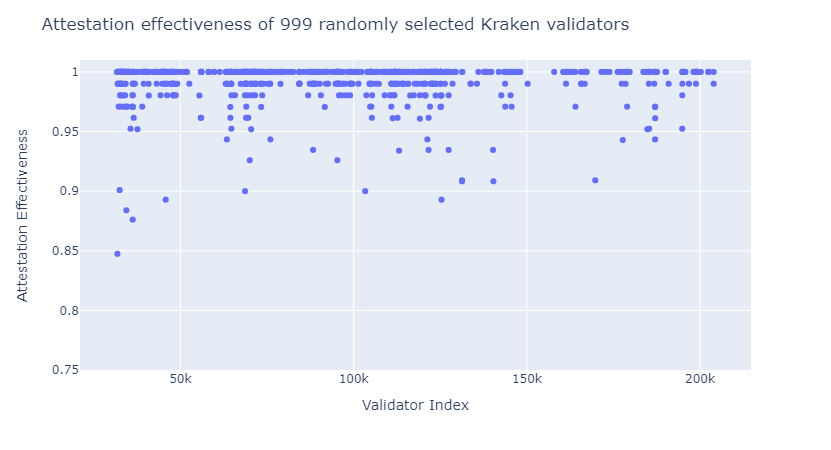

In [125]:
import plotly.express as px
fig = px.scatter(x= kraken_dict.keys(), y=kraken_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"})
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Kraken validators")
fig.update_yaxes(range=[0.75, 1.01])
fig.show()

For the 999 randomly selected validators belonging to the entity Kraken, we see that the attestation effectiveness scores lies in the range of 0.847 - 1. 

The 25th percentile score for this metric was 0.990099 and the 50th and 75th percentile scores were both 1 which is an indication of a very strong performance overall. 

Through the scatterplot we also see that almost all the randomly selected validators have attestation effectiveness scores of more than 0.95, with the exception of about 20-25 ones. 

#### Binance

In [95]:
binance_effectiveness_list = pd.Series(binance_dict.values())
binance_effectiveness_list.describe()

count    999.000000
mean       0.991999
std        0.022949
min        0.755725
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

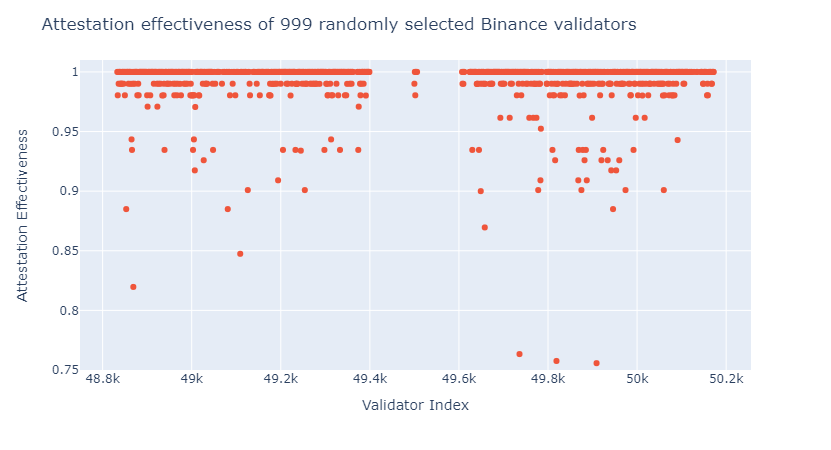

In [126]:
import plotly.express as px

lst = []
for i in range(999):
    lst.append("#EF553B")

fig = px.scatter(x= binance_dict.keys(), y=binance_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[0.75, 1.01])
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Binance validators")
fig.show()

Binance validators show a very similar performance with the exception of the average score among all chosen validators being a tad bit lesser than that of Kraken validators' (0.991999 vs 0.993977). 

Another observaitons is that the number of validators with scores less than 0.95 is a bit more. 

Another interesting point to note however is that among the validators that did have a score of more than 0.95, most of them had scores in the range of 0.98 - 1 with very few dropping below this range.

The minimum score among the selected validators is also considerably lesser in Binance's case (0.756 vs 0.847)

#### Lido

In [96]:
lido_effectiveness_list = pd.Series(lido_dict.values())
lido_effectiveness_list.describe()

count    999.000000
mean       0.994068
std        0.012583
min        0.916667
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

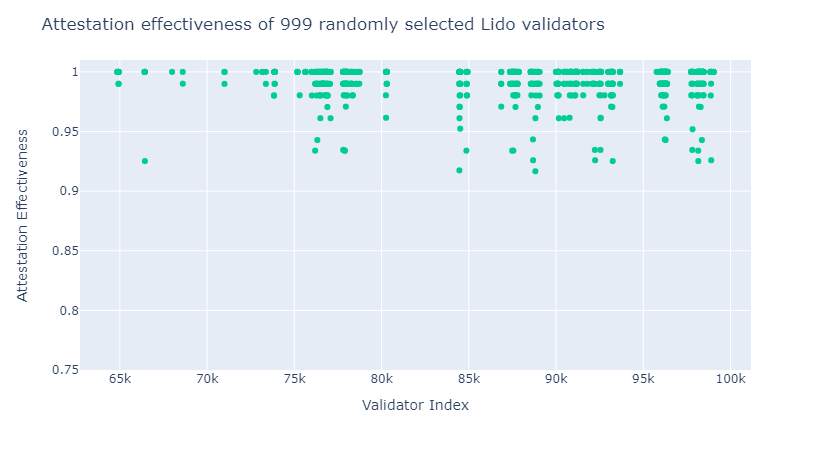

In [127]:
import plotly.express as px

lst = []
for i in range(999):
    lst.append("#00CC96")

fig = px.scatter(x= lido_dict.keys(), y=lido_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[0.75, 1.01])
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Lido validators")
fig.show()

When we compare the three staking entities for this metric, we see that the average score among all chosen validators is the highest for Lido (which has a stunning score of 0.994068)

The minimum score for this metric is also considerably higher than the two other staking entities with it being around 0.917. 

However an interesting observation here can be that the number of validators with scores of 0.99 and 1 are roughly equal (as seen from the scatterplot), whereas for the other 2 entities a lot more validators had scores of 1 than 0.99. 

In [182]:
kraken_display = []
binance_display = []
lido_display = []

for i in kraken_effectiveness_list:
    kraken_display.append(str(i))
    
for i in binance_effectiveness_list:
    binance_display.append(str(i))
    
for i in lido_effectiveness_list:
    lido_display.append(str(i))

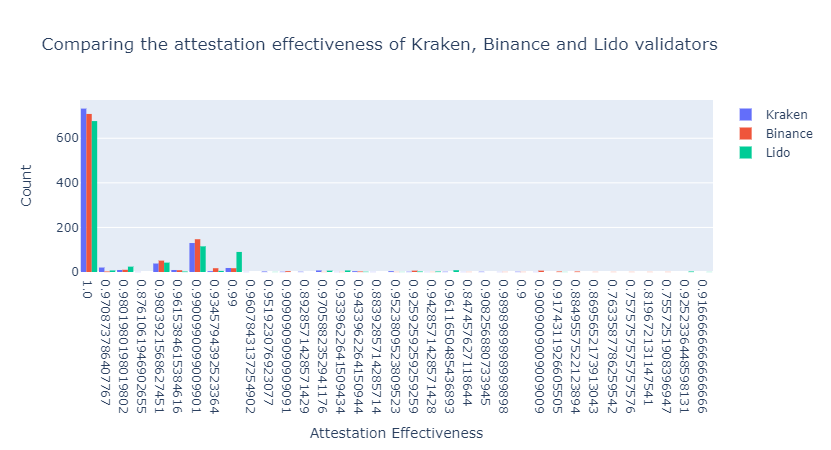

In [184]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=kraken_display,
    bingroup=1, name = "Kraken"))

fig.add_trace(go.Histogram(
    x=binance_display,
    bingroup=1, name = "Binance"))

fig.add_trace(go.Histogram(
    x=lido_display,
    bingroup=1, name = "Lido"))

fig.update_layout(
    bargap=0.1,
    title = "Comparing the attestation effectiveness of Kraken, Binance and Lido validators")

fig.update_xaxes(title="Attestation Effectiveness")
fig.update_yaxes(title="Count")

fig.show()

When we plot a histogram with the distribution of scores among validators belonging to all three entities, we get a very fascinating picture of the relative performance of each of these entities. 

One prominent observation is that out of 999 randomly selected validators, Kraken had the most number of validators having scores of 1 for this metric, followed by Binance, followed by Lido. 

## Earnings

The next performance metric we look at is the earnings of validators in intervals of 7 days. Some important disclaimers here:

- The earnings of randomly selected validators over a large time period is not just a direct reflection of their performance but is also dependent on when the validator was activated. For example: validators that were activated nearer to or at Epoch 0 are natrually expected to have higher earnings over a period of 365 days if they have consistently performed their duties vs validators that have been activated a few weeks ago with similar performances.

- That being said, given that all three entities control sizable percentages of staked ETH, we expect the earnings over a period of 7 days to be a more direct reflection of their performance as validators since the time period under consideration is a lot shorter. 

As explained in this [very insightful publication by Pintail](https://pintail.xyz/posts/beacon-chain-validator-rewards/), the total rewards $R$ that a validator with a base reward $B$, participation rate $P$ and uptime $U$ can have is:

$$R = \underbrace{\vphantom{\frac{1}{1}}3BPU	}_{\text{accuracy}} - \underbrace{\vphantom{\frac{1}{1}}3B(1-U)}_{\text{penalties}} + \underbrace{\frac{7}{8}BPU\frac{\ln(P)}{P-1}}_{\text{inclusion}} + \underbrace{\vphantom{\frac{1}{1}}\frac{1}{8}BPU}_{\text{block reward}}$$

As such, one base reward is given to each validator for accurately attesting to the current values of each of 3 aspects of the beacon chain. (Read more [here](https://runtimeverification.com/blog/formally-verifying-finality-in-gasper-the-core-of-the-beacon-chain/)).

In [83]:
kraken_earnings_7d = {}
kraken_earnings_31d = {}
kraken_earnings_365d = {}

binance_earnings_7d = {}
binance_earnings_31d = {}
binance_earnings_365d = {}

lido_earnings_7d = {}
lido_earnings_31d = {}
lido_earnings_365d = {}

In [ ]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_earnings_7d[i['validatorindex']] = i['performance7d']  
        kraken_earnings_31d[i['validatorindex']] = i['performance31d']  
        kraken_earnings_365d[i['validatorindex']] = i['performance365d']  

In [98]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_earnings_7d[i['validatorindex']] = i['performance7d']  
        binance_earnings_31d[i['validatorindex']] = i['performance31d']  
        binance_earnings_365d[i['validatorindex']] = i['performance365d']  

In [104]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_earnings_7d[i['validatorindex']] = i['performance7d']  
        lido_earnings_31d[i['validatorindex']] = i['performance31d']  
        lido_earnings_365d[i['validatorindex']] = i['performance365d']  

In [105]:
lst = []
for i in range(1000):
    lst.append(i)

#### Kraken

In [106]:
kraken_7d_list = pd.Series(kraken_earnings_7d.values())
kraken_7d_list.describe()

count    9.990000e+02
mean     3.812160e+07
std      2.566691e+06
min      3.585835e+07
25%      3.669782e+07
50%      3.700246e+07
75%      3.736093e+07
max      5.235788e+07
dtype: float64

The summary statistics of validator earnings over a period of one week show us that the earnings lie within a range of 35858350 Gwei - 52357880 Gwei. They also reveal that the mean value was 38121600 Gwei.

#### Binance

In [107]:
binance_7d_list = pd.Series(binance_earnings_7d.values())
binance_7d_list.describe()

count    1.000000e+03
mean     3.823622e+07
std      3.323205e+06
min      3.639837e+07
25%      3.684446e+07
50%      3.695899e+07
75%      3.715638e+07
max      1.043589e+08
dtype: float64

The average validator earnings over a period of 7 days is higher for Kraken by a factor of about 114620 Gwei. the specific value for Binance is 38236220 Gwei. At the same time, the maximum earnings over 7 days is considerbly higher (104358900 Gwei vs 52357880 Gwei) for Binance. 

#### Lido

In [43]:
lido_7d_list = pd.Series(lido_earnings_7d.values())
lido_7d_list.describe()

count    1.000000e+03
mean     3.865778e+07
std      2.590518e+06
min      3.672946e+07
25%      3.735165e+07
50%      3.752554e+07
75%      3.765700e+07
max      5.277812e+07
dtype: float64

In terms of the average validators' earnings over a 7 day interval, the selected Lido validators beat both the Kraken and Binance ones with an average of 38657780 Gwei.

The minimum among all the selected Lido validator earnings is also higher than that of Kraken's and Binance's, with the specific value being 36729460 Gwei.

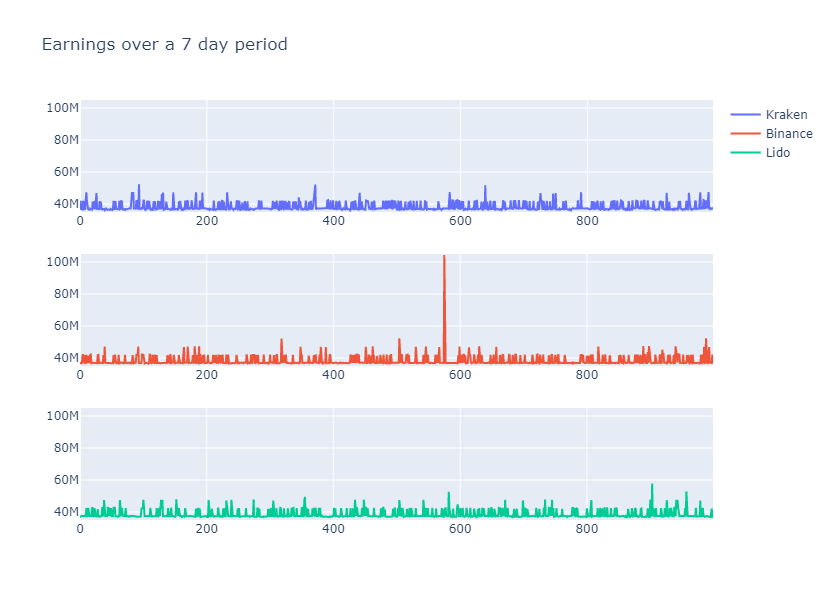

In [110]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    name = 'Kraken',
    x=lst,
    y=list(kraken_earnings_7d.values()),
), row=1, col=1)

fig.append_trace(go.Scatter(
    name = 'Binance',
    x=lst,
    y=list(binance_earnings_7d.values()),
), row=2, col=1)

fig.append_trace(go.Scatter(
    name = 'Lido',
    x=lst,
    y=list(lido_earnings_7d.values()),
), row=3, col=1)

fig.update_yaxes(range=[35000000, 105000000])
fig.update_yaxes(range=[35000000, 105000000])
fig.update_yaxes(range=[35000000, 105000000])

fig.update_layout(height=600, width=600, title_text="Earnings over a 7 day period")
fig.show()

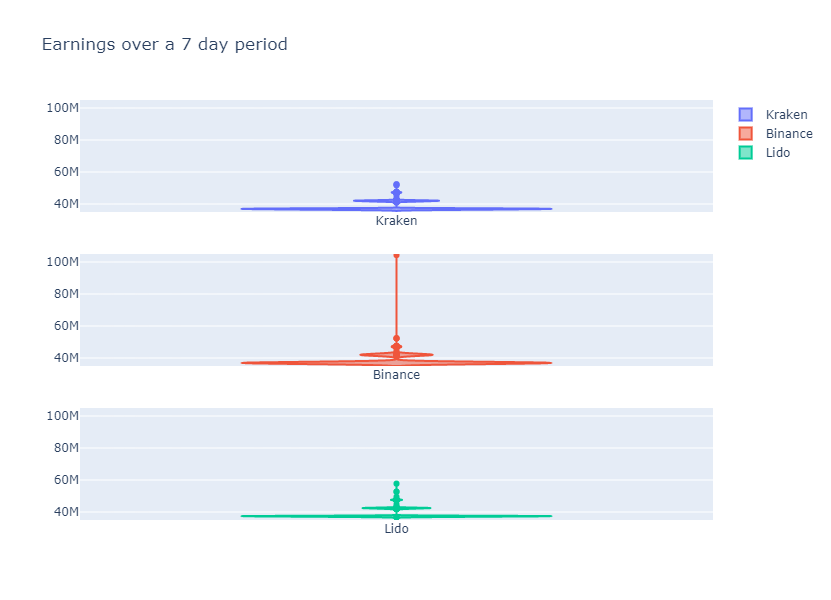

In [115]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Violin(
    name = 'Kraken',
    y=list(kraken_earnings_7d.values()),
), row=1, col=1)

fig.append_trace(go.Violin(
    name = 'Binance',
    y=list(binance_earnings_7d.values()),
), row=2, col=1)

fig.append_trace(go.Violin(
    name = 'Lido',
    y=list(lido_earnings_7d.values()),
), row=3, col=1)

fig.update_yaxes(range=[35000000, 105000000])
fig.update_yaxes(range=[35000000, 105000000])
fig.update_yaxes(range=[35000000, 105000000])

fig.update_layout(height=600, width=600, title_text="Earnings over a 7 day period")
fig.show()

**PROTIP**: Right now all the plots have been set to the same scale for comparision sake. But if you press the 'autoscale' button in the Plotly options, you can see an autoadjusted scale for each subplot

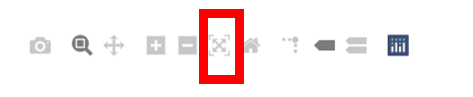

As we can see from the two plots above, the 7 day earnings of these validators are quite comparable accross the three entities except for maybe the one Binance validator that earned much more than the rest.

## Leaderboard (Top 10)

The next metric we look at is how frequently these entities made it to the Leaderboard of the week. 

[Beaconcha.in's weekly leaderboard](https://beaconcha.in/api/v1/docs/index.html#/Validator/get_api_v1_validator_leaderboard) is put together based on the earnings of validators over the past 7 days. Once we figure out the validators that made it to the top 10, we then backtrack and find the Eth1 Address that made the deoposit to activate this validator and from there find which entity they belong to.

In [187]:
x = requests.get('https://beaconcha.in/api/v1/validator/leaderboard?api_key={}'.format(api_key))

data = x.json()['data']
ranking_dict = {}
for i in data:
    ranking_dict[i['rank7d']] = i['validatorindex']

In [198]:
df = pd.DataFrame(list(ranking_dict.items()), columns = ['Rank', 'Validator index'])
df = df[:10]
df

,Rank,Validator index
0,1,49065
1,2,137635
2,3,35996
3,4,21290
4,5,103300
5,6,14113
6,7,85177
7,8,168700
8,9,48747
9,10,85973


In [348]:
entity_list = ['Piedao', 'Lido', 'Unknown', 'Stakefish', 'Unknown', 'Whale', 'Whale', 'Stakefish', 'Stakefish', 'Binance']
df['Entities'] = entity_list
df

,Rank,Validator index,Entities
0,1,49065,Piedao
1,2,137635,Lido
2,3,35996,Unknown
3,4,21290,Stakefish
4,5,103300,Unknown
5,6,14113,Whale
6,7,85177,Whale
7,8,168700,Stakefish
8,9,48747,Stakefish
9,10,85973,Binance


Among the three staking entities, Lido and Binance are the only ones that made it to the top 10 leaderboard and came in at posiitons 2 and 10 respectively. 

However it is important to know that given the lack of information on staking pools and their Eth1 addresses, the two 'Unknown' entities can very well be one of these three. 

Another point to take note here is that Stakefish - another ETH staking provider made it thrice in the top 10 validator list and PieDAO, the digital asset management company lead the leaderboard for the week!

## Validator balance

Next up on our analysis is this section where we look at the balances of our validators. 

Once again, it is important to note here that similar to validator earnings over large periods of time, validator balances are not always a direct indication of the performance of the validator but also depend on when the validator was activated. 

So the next section should be not be used as an indicator of which entity performes better than the other.

In [200]:
kraken = []
binance = []
lido = []

In [201]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken.append(i['balance'])

In [202]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance.append(i['balance'])

In [203]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido.append(i['balance'])

In [207]:
lst = []
for i in range(100*100):
    lst.append(i)

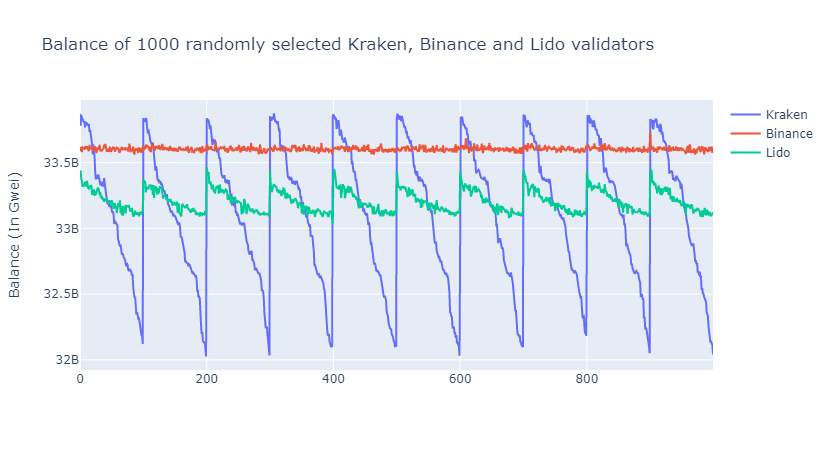

In [353]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Kraken', x=lst, y = kraken),
    go.Scatter(name='Binance', x=lst, y = binance),
    go.Scatter(name='Lido', x=lst, y= lido)
])

fig.update_layout(
    bargap=0.1,
    title = "Balance of 1000 randomly selected Kraken, Binance and Lido validators")

fig.update_yaxes(title="Balance (In Gwei)")


fig.show()

The graph we get is very beautiful (time to make an NFT out of it!) which reveals very regular trends and also reinforces the inferences we drew with regards to the diversity of validators activated in different time intervals for each of the three entities. 

We further look at the minimum and maximum balances in Gwei among the validators that we have selected. 

### Max balance

In [209]:
table_max_balance = [['Kraken', max(kraken)], ['Binance', max(binance)], ['Lido', max(lido)]]

In [215]:
print(tabulate(table_max_balance, tablefmt='fancy_grid'))

╒═════════╤═════════════╕
│ Kraken  │ 33873928554 │
├─────────┼─────────────┤
│ Binance │ 33732136359 │
├─────────┼─────────────┤
│ Lido    │ 33465761808 │
╘═════════╧═════════════╛


### Min balance

In [216]:
table_min_balance = [['Kraken', min(kraken)], ['Binance', min(binance)], ['Lido', min(lido)]]

In [217]:
print(tabulate(table_min_balance, tablefmt='fancy_grid'))

╒═════════╤═════════════╕
│ Kraken  │ 32025728976 │
├─────────┼─────────────┤
│ Binance │ 33561702567 │
├─────────┼─────────────┤
│ Lido    │ 33036603265 │
╘═════════╧═════════════╛


## Validator balance and age

Seeing the variability in validator balances within the three entities, it would be more meaningful to look at the validator balances as a function of the age of the validator. 

We calculate the age in Epochs by subtracting the activation Epoch for the validator from the current Epoch (which is 56722)

In [218]:
epoch = 56722

In [221]:
kraken_balance_age = []
binance_balance_age = []
lido_balance_age = []

In [222]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [223]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [224]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [229]:
kraken_balance = []
kraken_age = []

for i in kraken_balance_age:
    kraken_balance.append(i[0])
    kraken_age.append(i[1])

In [242]:
binance_balance = []
binance_age = []

for i in binance_balance_age:
    binance_balance.append(i[0])
    binance_age.append(i[1])

In [243]:
lido_balance = []
lido_age = []

for i in lido_balance_age:
    lido_balance.append(i[0])
    lido_age.append(i[1])

#### Kraken

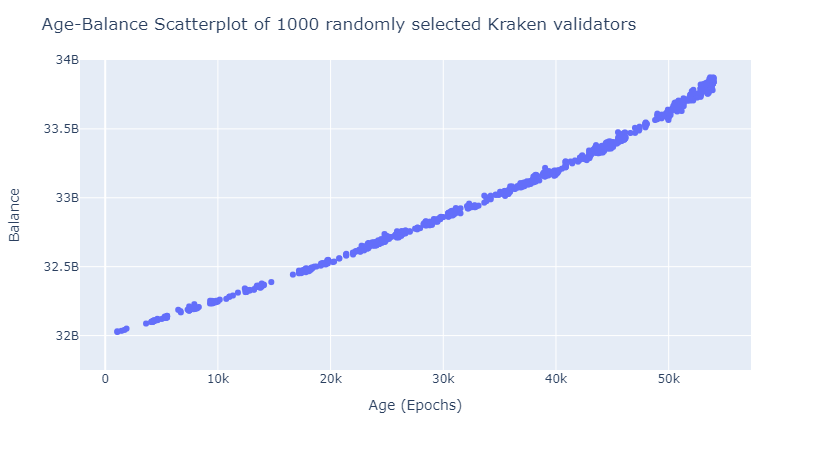

In [264]:
fig = px.scatter(x= kraken_age, y=kraken_balance, labels = {"x": "Age (Epochs)", "y": "Balance"})
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Kraken validators")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.show()

On looking at the scatterplot, we see how we get roughly a straight line curve. With the balance of validators increasing over time. It is however not an exact straight line since validator rewards decrease as more and more validators get activated and join the network.

#### Binance

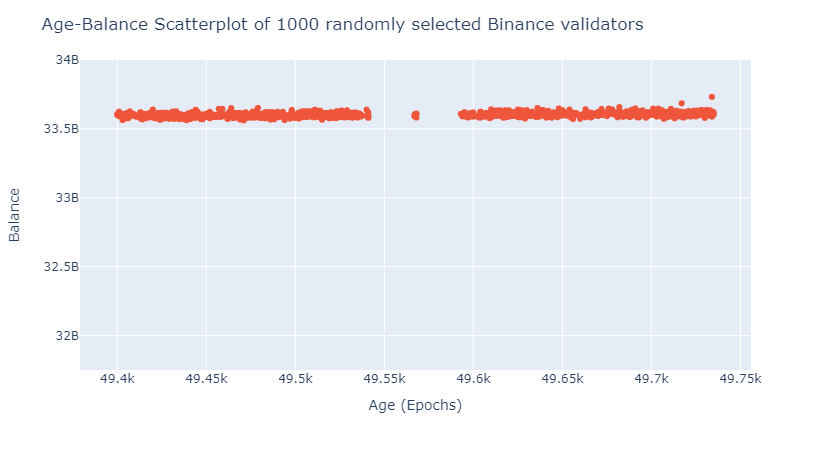

In [265]:
lst = []
for i in range(1000):
    lst.append("#EF553B")
    
fig = px.scatter(x= binance_age, y=binance_balance, labels = {"x": "Age (Epochs)", "y": "Balance"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Binance validators")
fig.show()

Similar to Kraken, for the same y-axis range, the scatter plot resembles a stright line curve (but in this case more of a horizontal straight line). However this is because the range of the ages of the selected Binance validators is much smaller.

When we look at the autoscaled version of the same graph we can notice that there are roughly three clusters of validators formed primarily due to the time when they were activated (with the balances of the validators from each of these two clusters being roughly equal) 

#### Lido

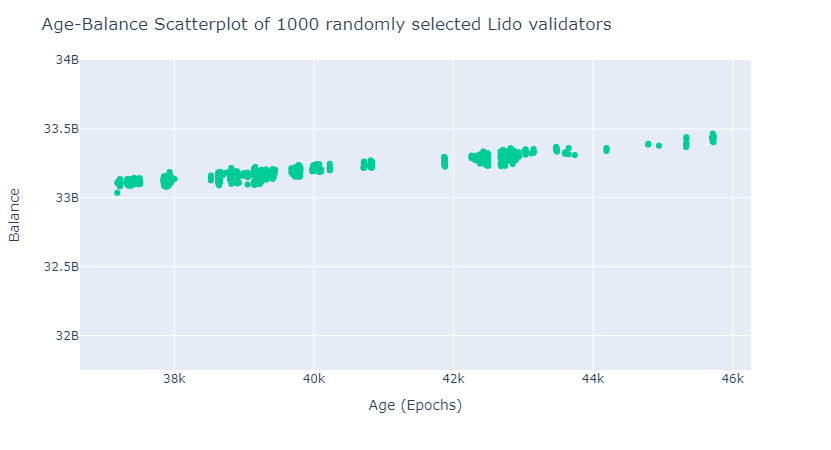

In [266]:
lst = []
for i in range(1000):
    lst.append("#00CC96")

fig = px.scatter(x= lido_age, y=lido_balance, labels = {"x": "Age (Epochs)", "y": "Balance"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Lido validators")
fig.show()

In the case of Lido, the age of the validators in consideration are much smaller when compared Kraken's but bigger when compared to Binance's.

The autoscaled plot reveals multiple clusters of validators with increasing balances with increasing ages.

## Missed attestations 

We finally end off our analysis by looking at the number of missed attestations for the validators with the lowest score for average attestation effectiveness for each of the three entities. 

#### Kraken

In [291]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/31882?api_key={}'.format(api_key))
data = x.json()['data']

In [292]:
kraken_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        kraken_missed += i['missed_attestations']

In [293]:
table = [['Missed attestations', kraken_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤═════╕
│ Missed attestations │ 373 │
╘═════════════════════╧═════╛


#### Binance

In [294]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/48869?api_key={}'.format(api_key))
data = x.json()['data']

In [295]:
binance_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        binance_missed += i['missed_attestations']

In [296]:
table = [['Missed attestations', binance_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤═════╕
│ Missed attestations │ 310 │
╘═════════════════════╧═════╛


#### Lido

In [300]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/84461?api_key={}'.format(api_key))
data = x.json()['data']

In [305]:
lido_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        lido_missed += i['missed_attestations']

In [306]:
table = [['Missed attestations', lido_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤════╕
│ Missed attestations │ 54 │
╘═════════════════════╧════╛


We observe a huge difference in the number of missed atteststions by the worst performing Lido validator and the worst performing Kraken and Binance validators (54 vs 373 and 310). This is an indication that the Lido validators we selected perform significantly better than the Kraken and Binance validators that we have selected for this metric. 